## Lab 4
## Recurrent Neural Networks


Andre Jo 22199
Josué Say 

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

Cargamos primero el archivo csv y normalizamos los valores de la mancha de los soles. 

      0  1  2         3  4    5  6  7
0  1818  1  1  1818.001 -1 -1.0  0  1
1  1818  1  2  1818.004 -1 -1.0  0  1
2  1818  1  3  1818.007 -1 -1.0  0  1
3  1818  1  4  1818.010 -1 -1.0  0  1
4  1818  1  5  1818.012 -1 -1.0  0  1
Epoch [10/50], Loss: 0.017641
Epoch [20/50], Loss: 0.007551
Epoch [30/50], Loss: 0.004268
Epoch [40/50], Loss: 0.003305
Epoch [50/50], Loss: 0.002896


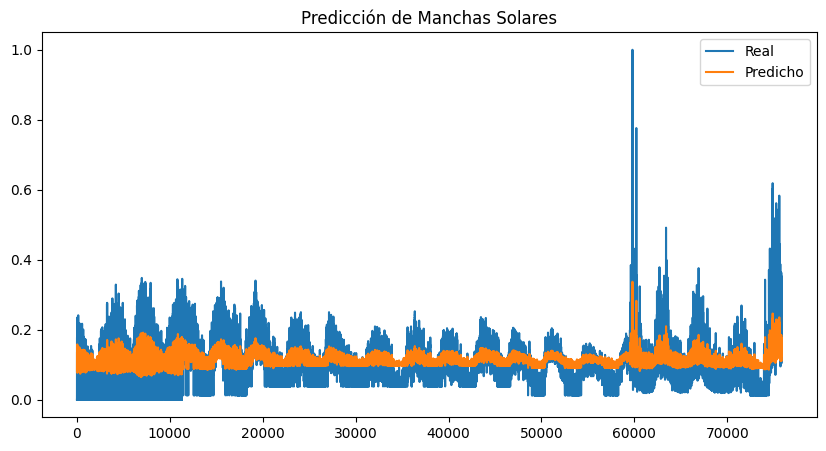

In [ ]:


# ------------------------------
# 1. Cargar el dataset de manchas solares
# ------------------------------
# Cargar los datos de manchas solares desde el archivo CSV descargado
# Asegúrate de tener el archivo en el mismo directorio o usa la ruta completa
url = "sunspot.csv"  # Reemplaza con la ruta de tu archivo
data = pd.read_csv(url, sep=";", header=None)

# Mostrar las primeras filas para ver la estructura del dataset
print(data.head())

# Normalizar la columna de manchas solares 
sunspot_data = data[5].values  # Ajusta el índice si la columna cambia
sunspot_data = (sunspot_data - np.min(sunspot_data)) / (np.max(sunspot_data) - np.min(sunspot_data))  # Normalización

# Convertir a tensores
sunspot_data = torch.tensor(sunspot_data, dtype=torch.float32)

# ------------------------------
# 2. Crear dataset con ventanas deslizantes
# ------------------------------
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]  # La siguiente mancha solar a predecir
        xs.append(x)
        ys.append(y)
    return torch.stack(xs), torch.stack(ys)

seq_length = 10  # ventana inicial de 10 pasos
X, y = create_sequences(sunspot_data, seq_length)

# Añadir dimensión batch
X = X.unsqueeze(-1)  # [batch, seq_len, input_size]
y = y.unsqueeze(-1)  # [batch, 1]

# ------------------------------
# 3. Definir el modelo RNN
# ------------------------------
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: [batch, seq_len, input_size]
        out, h = self.rnn(x)  # out: [batch, seq_len, hidden_size]
        out = out[:, -1, :]   # Tomar la última salida en el tiempo
        out = self.fc(out)    # [batch, output_size]
        return out

model = RNNModel(input_size=1, hidden_size=16, output_size=1)

# ------------------------------
# 4. Entrenamiento
# ------------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

# ------------------------------
# 5. Predicción
# ------------------------------
model.eval()
with torch.no_grad():
    predictions = model(X).squeeze().numpy()

# Visualizar los resultados
plt.figure(figsize=(10,5))
plt.plot(y.squeeze().numpy(), label="Real")
plt.plot(predictions, label="Predicho")
plt.legend()
plt.title("Predicción de Manchas Solares")
plt.show()


# Seccion 1
Se declararon las ventanas a un valor de 5

In [21]:
# Tamaño de ventana pequeño (5)
seq_length_small = 5

# Crear secuencias con tamaño de ventana pequeño
X_small, y_small = create_sequences(sunspot_data, seq_length_small)

# Añadir dimensión batch
X_small = X_small.unsqueeze(-1)  # [batch, seq_len, input_size]
y_small = y_small.unsqueeze(-1)  # [batch, 1]


In [22]:
# Definir el modelo RNN para tamaño de ventana 5
model_small = RNNModel(input_size=1, hidden_size=16, output_size=1)

# Entrenamiento
optimizer_small = optim.Adam(model_small.parameters(), lr=0.01)
criterion = nn.MSELoss()

start_time = time.time()

num_epochs = 50
for epoch in range(num_epochs):
    model_small.train()
    optimizer_small.zero_grad()
    outputs = model_small(X_small)
    loss = criterion(outputs, y_small)
    loss.backward()
    optimizer_small.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Experiment 1 (Ventana 5) - Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

end_time = time.time()
print(f"Tiempo total de entrenamiento: {end_time - start_time} segundos")


Experiment 1 (Ventana 5) - Epoch [10/50], Loss: 0.004984
Experiment 1 (Ventana 5) - Epoch [20/50], Loss: 0.003564
Experiment 1 (Ventana 5) - Epoch [30/50], Loss: 0.003147
Experiment 1 (Ventana 5) - Epoch [40/50], Loss: 0.002657
Experiment 1 (Ventana 5) - Epoch [50/50], Loss: 0.002223
Tiempo total de entrenamiento: 6.210490942001343 segundos


Presentacion de resultados

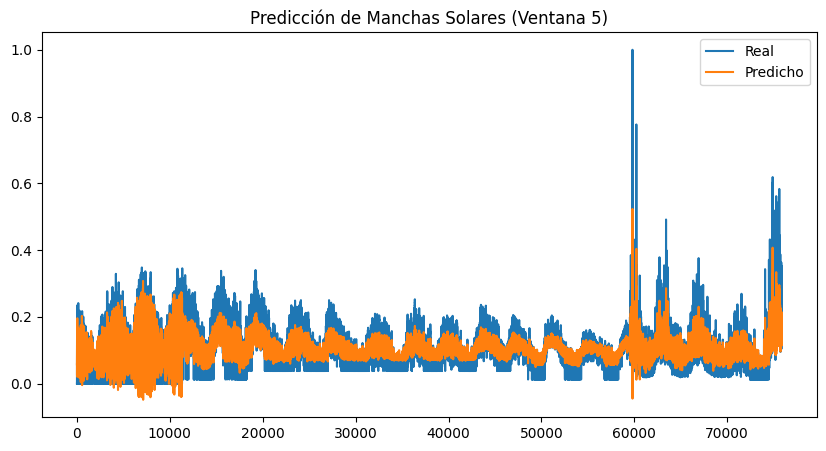

In [23]:
# Predicción para ventana pequeña
model_small.eval()
with torch.no_grad():
    predictions_small = model_small(X_small).squeeze().numpy()

# Visualizar los resultados
plt.figure(figsize=(10,5))
plt.plot(y_small.squeeze().numpy(), label="Real")
plt.plot(predictions_small, label="Predicho")
plt.legend()
plt.title("Predicción de Manchas Solares (Ventana 5)")
plt.show()


El modelo sigue de cerca el patrón de los datos reales durante la mayoría del período, su principal limitación es su incapacidad para predecir con precisión los picos abruptos y de gran magnitud, como el que se observa alrededor del dato 60,000. El modelo subestima significativamente estos eventos extremos, lo que indica que, si bien es bueno para los patrones regulares, tiene dificultades para manejar las anomalías o los cambios bruscos en la serie. En resumen, el modelo es útil para la predicción de tendencias generales pero limitado para los valores atípicos y eventos de alta variabilidad.

Seccion declaracion 20 datos

In [24]:
# Tamaño de ventana mediana (20)
seq_length_medium = 20

# Crear secuencias con tamaño de ventana mediana
X_medium, y_medium = create_sequences(sunspot_data, seq_length_medium)

# Añadir dimensión batch
X_medium = X_medium.unsqueeze(-1)  # [batch, seq_len, input_size]
y_medium = y_medium.unsqueeze(-1)  # [batch, 1]


Entrenamiento

In [25]:
# Definir el modelo RNN para tamaño de ventana 20
model_medium = RNNModel(input_size=1, hidden_size=16, output_size=1)

# Entrenamiento
optimizer_medium = optim.Adam(model_medium.parameters(), lr=0.01)

start_time = time.time()

for epoch in range(num_epochs):
    model_medium.train()
    optimizer_medium.zero_grad()
    outputs = model_medium(X_medium)
    loss = criterion(outputs, y_medium)
    loss.backward()
    optimizer_medium.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Experiment 2 (Ventana 20) - Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")


end_time = time.time()
print(f"Tiempo total de entrenamiento: {end_time - start_time} segundos")


Experiment 2 (Ventana 20) - Epoch [10/50], Loss: 0.012000
Experiment 2 (Ventana 20) - Epoch [20/50], Loss: 0.005664
Experiment 2 (Ventana 20) - Epoch [30/50], Loss: 0.003944
Experiment 2 (Ventana 20) - Epoch [40/50], Loss: 0.003232
Experiment 2 (Ventana 20) - Epoch [50/50], Loss: 0.002799
Tiempo total de entrenamiento: 21.930805683135986 segundos


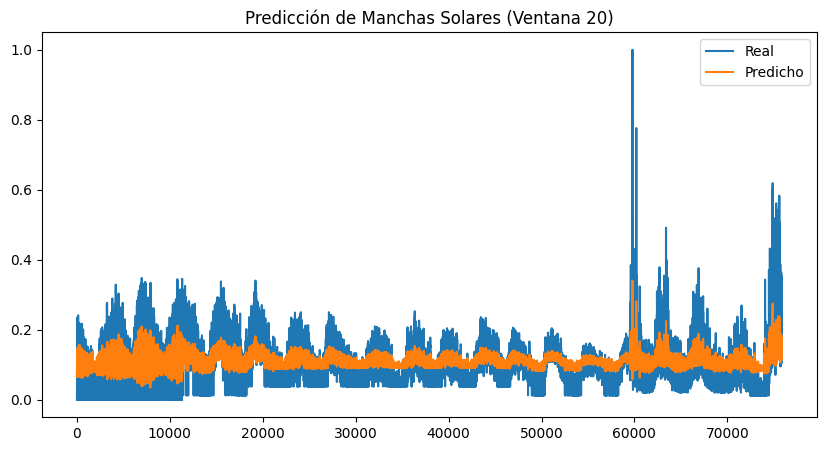

In [26]:
# Predicción para ventana mediana
model_medium.eval()
with torch.no_grad():
    predictions_medium = model_medium(X_medium).squeeze().numpy()

# Visualizar los resultados
plt.figure(figsize=(10,5))
plt.plot(y_medium.squeeze().numpy(), label="Real")
plt.plot(predictions_medium, label="Predicho")
plt.legend()
plt.title("Predicción de Manchas Solares (Ventana 20)")
plt.show()


El modelo logra capturar la tendencia general de los datos, como los ciclos y las fluctuaciones, pero su precisión es muy baja. La línea predicha se mantiene casi plana y no se ajusta a la forma de la línea real, lo que indica que el modelo no ha logrado aprender los patrones complejos de la serie de tiempo.

Declaracion ventana 100

In [27]:
# Tamaño de ventana amplio (100)
seq_length_large = 100

# Crear secuencias con tamaño de ventana amplio
X_large, y_large = create_sequences(sunspot_data, seq_length_large)

# Añadir dimensión batch
X_large = X_large.unsqueeze(-1)  # [batch, seq_len, input_size]
y_large = y_large.unsqueeze(-1)  # [batch, 1]


In [28]:
# Definir el modelo RNN para tamaño de ventana 100
model_large = RNNModel(input_size=1, hidden_size=16, output_size=1)

# Entrenamiento
optimizer_large = optim.Adam(model_large.parameters(), lr=0.01)

start_time = time.time()

for epoch in range(num_epochs):
    model_large.train()
    optimizer_large.zero_grad()
    outputs = model_large(X_large)
    loss = criterion(outputs, y_large)
    loss.backward()
    optimizer_large.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Experiment 3 (Ventana 100) - Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

end_time = time.time()
print(f"Tiempo total de entrenamiento: {end_time - start_time} segundos")


Experiment 3 (Ventana 100) - Epoch [10/50], Loss: 0.003639
Experiment 3 (Ventana 100) - Epoch [20/50], Loss: 0.003695
Experiment 3 (Ventana 100) - Epoch [30/50], Loss: 0.003458
Experiment 3 (Ventana 100) - Epoch [40/50], Loss: 0.003301
Experiment 3 (Ventana 100) - Epoch [50/50], Loss: 0.003085
Tiempo total de entrenamiento: 132.70788407325745 segundos


Predicción modelo 100

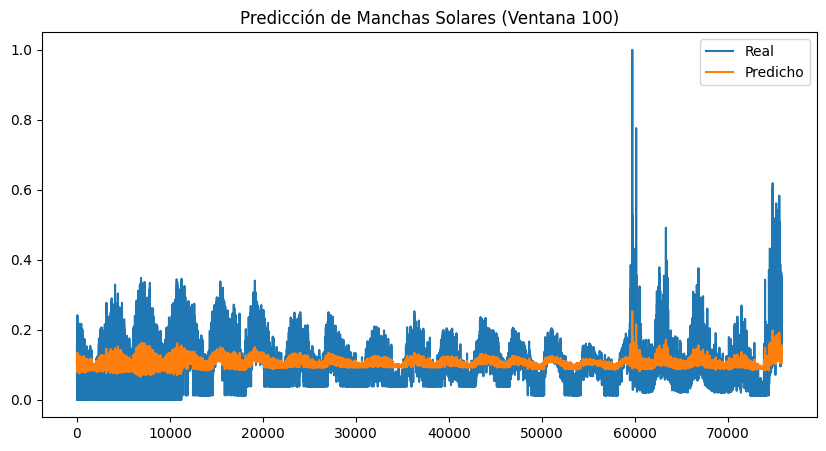

In [29]:
# Predicción para ventana amplia
model_large.eval()
with torch.no_grad():
    predictions_large = model_large(X_large).squeeze().numpy()

# Visualizar los resultados
plt.figure(figsize=(10,5))
plt.plot(y_large.squeeze().numpy(), label="Real")
plt.plot(predictions_large, label="Predicho")
plt.legend()
plt.title("Predicción de Manchas Solares (Ventana 100)")
plt.show()


Se puede inferir que entre más n valor de ventanas hay, el modelo no se va acoplando con el modelo real como se observa en la gráfica de 100 ventanas y 20 ventanas.  